In [3]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import math

# Interpolacija

Zamislimo da nam je poznata neke informacije o funkciji $f$ te ju želimo zamijeniti s nekom drugom funkcijom $\varphi$ na skupu $X\subseteq\mathbb{R}$ na osnovu tih informacija, tako da se $f$ i $\varphi$ što više podudaraju. 
Skup X ćemo gledati kao interval $[a,b]$ ili kao diskretan skup tocaka.

<b>Interpolacija</b> je zahtijev da se funkcije $f$ i $\varphi$ podudaraju na nekom konačnom skupu točaka. Te točke zovemo <b>čvorovi</b> interpolacije. U najjednostavnijem obliku interpolacije tražimo da se $f$ i $\varphi$ podudaraju na konačnom broju točaka $x_0,x_1,...,x_n$

Najjednostavniji oblik je zasigurno interpolacija polinomima. Promatramo funkciju $f$ na intervalu $[a,b]$ te točke $a \leq x_0 < x_1 < · · · < x_n \leq b$ te su poznate vrijednosti $f(x_k) = f_k ,  k = 0,...,n$. Koristan će nam biti slijedeći teorem:

<b>Egzistencija i jedinstvenost interpolacionog polinoma</b><br>
Neka je $n \in \mathbb{N}$. Za zadane točke $(x_k, f_k), k = 0, . . ., n$, gdje je
$x_i \neq x_j$ za $i \neq j$, postoji jedinstveni (interpolacioni) polinom stupnja najviše $n$

$$\varphi(x) := p_n(x) = a_0 + a_1x + · · · + a_nx^n$$

za koji vrijedi
$p_n(x_k) = f_k, k = 0, . . ., n$

<br>
Za izračunavanje vrijednosti polinoma u točki koristi se Hornerov algoritam koji računa polinom iz:<br>
    $$f(x) = (((a_nx + a_{n−1}) x + a_{n−2}) x + . . . + a_1) x + a_0$$

In [4]:
def horner(a, x):
    #a je polje koeficijenata, x vrijednost
    n = len(a)
    s = a[0]    #koeficijent uz x^n
    for i in range(1, n):
        s = s*x + a[i]
    return s

Da se vratimo na interpolaciju, najlakši način za pronaći ploniom stupnja $n$ koji prolazi kroz zadanih $n+1$ točaka jest rješavanjem pripadnog sustava jednadžbi:

Neka su zadane točke $(x_0,f_0),...,(x_n,f_n)$, tražimo polinom oblika $\varphi(x) = a_0 + a_1x + ... + a_nx$

$$\varphi(x_0) = f_0$$
$$...$$
$$\varphi(x_n) = f_n$$
Tu će nam poslužiti numpy funkcija <b>np.linalg.solve</b> koja rješava pripadni sustav.

#### Zadatak.<br>
Neka su zadane točke $(−1, 3),(1, 5),(2, 0)$. Pronađi interpolacioni polinom stunja manjeg ili jednakog $2$ koji prolazi tim točkama.

Rješavamo sustav:<br>
$$\varphi(−1) = 3 \Leftrightarrow a_0 − a_1 + a_2 = 3$$
$$\varphi(1) = 5 \Leftrightarrow a_0 + a_1 + a_2 = 5$$
$$\varphi(2) = 0 \Leftrightarrow a_0 + 2a_1 + 4a_2 = 0$$

In [5]:
a = np.array([[1,-1,1], [1,1,1], [1,2,4]])
b = np.array([3,5,0])
x = np.linalg.solve(a,b)
x

array([ 6.,  1., -2.])

In [6]:
#x je obrnutog poretka pa treba obrnuti za primjenit hornera
x[::-1]

array([-2.,  1.,  6.])

In [7]:
y = horner(x[::-1], -1),horner(x[::-1], 1),horner(x[::-1], 2) 
y

(3.0, 5.0, 0.0)

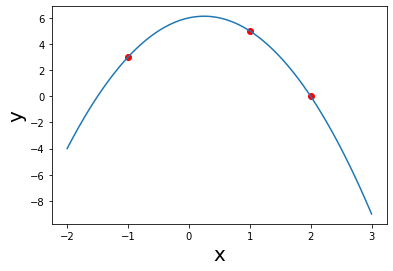

In [8]:
fig1,ax1 = plt.subplots()
x1 = np.linspace(-2,3,100)
ax1.plot(x1, horner(x[::-1],x1))
ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('y', fontsize=20)
ax1.scatter(np.array([-1,1,2]), np.array(y), color = 'red')

Dakle dobili smo jedinstvenu funkciju koja interpolira te tri točke.<br>
No, ovakav način računanja nije dovoljno efikasan te se u praksi koriste druge metode: Newtonova i Lagrangeova.

### Lagrangeov interpolacijski polinom
Neka su zadane točke $(x_i, y_i), i = 0, 1, . . . , n$. Definiramo polinome $\ell_i \in \mathcal{P}_n$ za $i = 0, 1, . . . , n$
$$\ell_i(x) = \prod_{{j=0},{j\neq i}}^{n} \frac {x - x_j}{x_i - x_j} = \frac {\omega_i(x)}{\omega_i(x_i)}$$ 
gdje je
$$\omega(x) = \prod_{i = 0}^{n} (x - x_i)$$
$$\omega_i(x) = \frac {\omega(x)}{x - x_i}$$
te očito za $\ell_i$ vrijedi $\ell_i(x) = \delta_{ij}$

pa interpolacijski polinom $\varphi$ možemo dobiti kao
$$\varphi(x) = \sum_{i = 0}^{n} y_i \ell_i(x)$$

In [9]:
def l(a,i,x):
    temp = [(x - a[j])/(a[i] - a[j]) for j in range(len(a)) if j != i]
    return np.prod(temp)

def lagrange(a,b,x):
    n = len(a)
    if (n != len(b)):
        print('Ulazni podaci nisu iste duljine!')
    rez = [b[i]*l(a,i,x) for i in range(n)]
    return sum(rez)

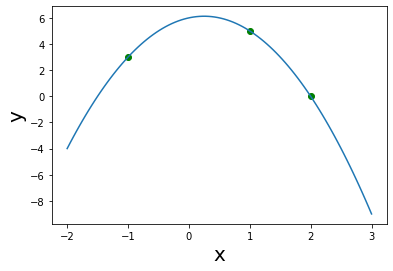

In [10]:
fig2,ax2 = plt.subplots()
x2 = np.linspace(-2,3,100)
ulaz_x = np.array([-1,1,2])
ulaz_y = np.array([3,5,0])
ax2.plot(x2, [lagrange(ulaz_x, ulaz_y, x2[i]) for i in range(len(x2))] )
ax2.set_xlabel('x', fontsize=20)
ax2.set_ylabel('y', fontsize=20)
ax2.scatter(np.array([-1,1,2]), np.array(y), color = 'g')

Naravno dobili smo istu funkciju interpolacije

### Newtonov interpolacijski polinom

Lagrangeov oblik pak nije pogodan za povečanje stupnja polinoma jer interpolacijski polinom
moramo računati od početka. Kod Newtonovog oblika to je jednostavno.
Neka su zadane točke $(x_i, y_i), i = 0, 1, . . . , n$. <b>Newtonov interpolacijski polinom</b> za zadane čvorove zadan je s:
$$\varphi(x) = f[x_0] + \sum_{i = 1}^{n}f[x_0,...,x_i](x - x_0)...(x - x_{i-1})$$

Brojeve $f[x_0,...,x_i]$ zovemo podijeljene razlike te vrijedi
$$f[x_i] = y_i$$
<br>
$$f[x_i,...,x_{i+k}]=\frac{f[x_{i+1},...,x_{i+k}] - f[x_i,...,x_{i+k-1}]}{x_{i+k} - x_i}$$

In [11]:
def pod_razlike(x,y):
    
    # x: np.lista elemenata apscise
    # y: np.lista elemenata ordinate
    n = len(x)
    if (n != len(y)):
        print('netocno zadane varijable')
        return

    x.astype(float)
    y.astype(float)
    x = np.copy(x)
    res = np.copy(y)
    for k in range(1,n):
        res[k:n] = (res[k:n] - res[k-1])/(x[k:n] - x[k-1])

    return res

def newton(a,G,x): 
    """G je pod_razlike(a,b), radi brzine se računa van funkcije"""
    n = len(a)
    res = G[n-1] 
    for i in range(n-2,-1,-1):
        res = res*(x - a[i]) + G[i]
        
    return res

In [12]:
"""provjera"""
G = pod_razlike(ulaz_x,ulaz_y)
print('Podjeljene razlike su ', G)
newton(ulaz_x, G, -1),newton(ulaz_x, G, 1),newton(ulaz_x, G, 2)

Podjeljene razlike su  [ 3  1 -2]


(3, 5, 0)

Interpolacijske funkcije koriste se pri aproksimaciji funkcija, kada jednu (složeniju) funkciju treba zamijeniti drugom (jednostavnijom). Sada ću na primjeru eksponencijalne funkcije $f(x) = e^x$ pokazati kako se aproksimacija "približava" pravoj funkciji što joj dajemo veći broj interpolacijskih točaka na intervalu $[-5,5]$.

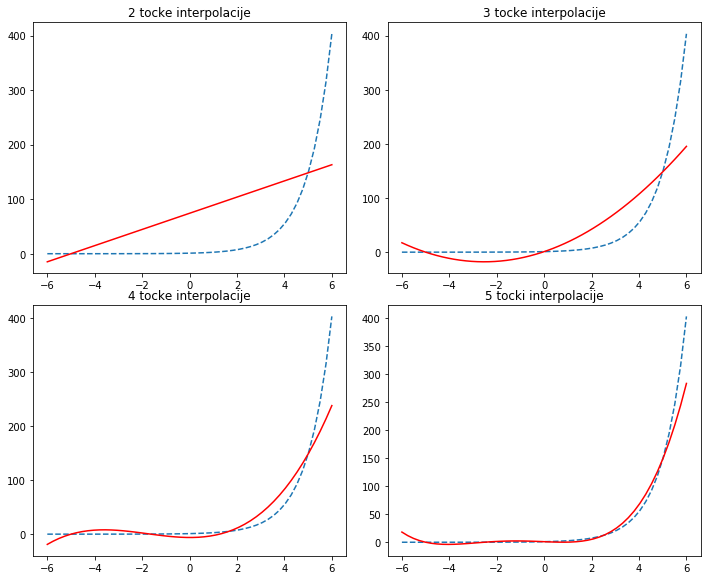

In [13]:
def crtaj(br_tocaka,ax,title):
    x = np.linspace(-5,5,br_tocaka)
    y = np.exp(x)
    G = pod_razlike(x,y)
    dots = np.linspace(-6,6)
    ax.plot(dots, np.exp(dots), linestyle='--')
    ax.set_title(title)
    ax.plot(dots ,np.array([newton(x, G, i) for i in dots]), color='r' )
    return
    
fig, ((a1,a2), 
       (a3,a4)) = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout()
crtaj(2, a1, '2 tocke interpolacije')
crtaj(3, a2, '3 tocke interpolacije')
crtaj(4, a3, '4 tocke interpolacije')
crtaj(5, a4, '5 tocki interpolacije')

## Čebiševljevi polinomi

Kod aproksimacije funkcija interpolacijskim polinomima najbitnija je dakle minimizacija greške. Da se naslutiti da bi nekim optimalnim izborom točaka kroz koje interpoliramo mogla smanjiti greška. Tu nam se javljaju <b>Čebiševljevi polinomi</b>. Oni se najčešće oznažavaju s $T_n$ te zadovoljavaju:

$$T_n(x) = cos(n\,arccos\, x),\,\, x \in [-1,1]$$

Očito je $T_0(x) = 1$ i $T_1(x) = x$. Također može se dokazati da je za svaki $n \in \mathbb{N}$, $T_n$ polinom stupnja $n$.
Graf prvih par polinoma izgleda ovako (koristeći crtanje funkcija ugrađeno u sympy):


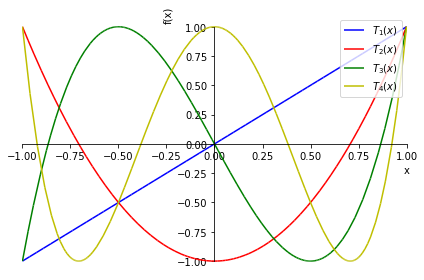

In [36]:
from sympy.plotting import plot

x = sp.symbols('x')
p1 = plot(x, (x,-1,1), line_color='blue',show=False)
p2 = plot(sp.cos(2 * sp.acos(x)), (x,-1,1), line_color='r', show=False)
p3 = plot(sp.cos(3 * sp.acos(x)), (x,-1,1), line_color='green', show=False)
p4 = plot(sp.cos(4 * sp.acos(x)), (x,-1,1), line_color='y', show=False)
p1.extend(p2)
p1.extend(p3)
p1.extend(p4)
p1[0].label = '$T_1(x)$'
p1[1].label = '$T_2(x)$'
p1[2].label = '$T_3(x)$'
p1[3].label = '$T_4(x)$'
p1.legend = True
p1.show()

Problem izbora točaka interpolacije svodi se na izbor $n+1$ točaka $x_i \in [-1,1],\, i = 0,...,n$ takvih da se minimizira izraz:

$$ \max_{-1\leq x \leq 1} |(x - x_0)\cdots (x - x_n)|$$

Polinom u prethodnoj relaciji je stupnja $n+1$ i ima vodeći koeficijent $1$. Može se pokazati da minimum postiže upravo ako se za točke $x_0,...,x_n$ uzmu nultočke polinoma $T_{n+1}$. Numpy u sebi ima ugrađene funkcije koje računaju Čebiševljeve polinome i njihove nultočke. Za primjer ću izračunati nultočke od $T_3$.

In [25]:
def transform(a,b,c,d,x): #transform x iz [a,b] --> [c,d]
    return (x - a)*(d - c)/(b - c) + a

def n_cheb_roots(n):
    c = np.append(np.zeros(n),1)
    cheb = np.polynomial.chebyshev.Chebyshev(c)
    return cheb.roots()

n_cheb_roots(3)

array([-8.66025404e-01,  1.08311797e-16,  8.66025404e-01])

Sada ću usporediti interpolacijski polinom za funkciju $\sin(x^3 - x)$ na intervalu $[0,2]$ koristeći za čvorove prvo ekvidistantnu mrežu a zatim i nultočke Čebiševljevog polinoma. Broj čvorova ću staviti na $5$. Također trebat će nultočkama Čebiševljevog polinoma dodati $1$ da bi se preslikalo interval $[-1,1]$ u $[0,2]$. Napominjem da je većina koda kojeg ću koristiti kopija funkcije <b>crtaj</b>. 

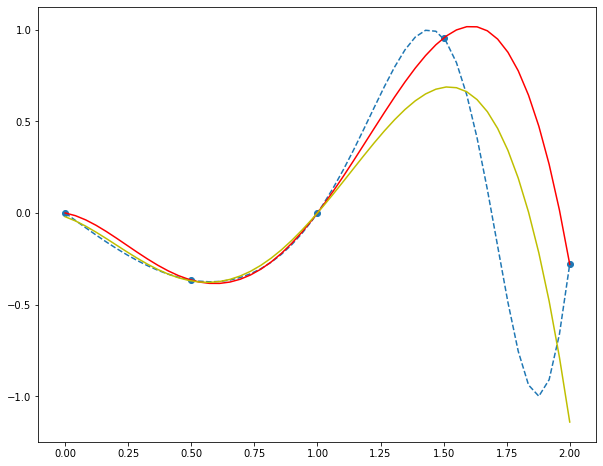

In [16]:
fig6,ax6 = plt.subplots(figsize=(10,8))
x = np.linspace(0,2,5)
y = np.array([sp.sin(i**3 - i) for i in x])
G = pod_razlike(x,y)
dots = np.linspace(0,2)
ax6.scatter(x,y)
ax6.plot(dots, [sp.sin(i**3 - i) for i in dots], linestyle='--')
ax6.plot(dots ,np.array([newton(x, G, i) for i in dots]), color='r' )

cheb = n_cheb_roots(5)
cheb = np.add(cheb,1) #moramo dodat 1 da bi se interval [-1,1] transformirao u [0,2]"""
y2 = np.array([sp.sin(i**3 - i) for i in cheb])
G2 = pod_razlike(cheb,y2)
ax6.plot(dots ,np.array([newton(cheb, G2, i) for i in dots]), color='y' )

### Greška interpolacije (uniformna)

Aproksimacija je dobra onliko koliko je dobra njena greška. Grešku se najčešće gleda uniformno tj uzima se najveća moguća greška na zadanom intervalu. Iz numeričke matematike slijedi formula za ocijenu uniformne pogreške za interpolaciju polinomom $\varphi$:

$$\max_{x\in [x_1,x_n]}|f(x) - \varphi (x)| \leq 
\frac{\omega (x_1,...,x_n)}{n!}\cdot M_n(f)$$

gdje je
$$\omega (x_1,...,x_n) = \max_{x\in [x_1,x_n]}|(x - x_0)\cdots (x - x_n)|$$

Želim pokazati na primjeru da izborom nultočaka Čebiševljevog polinoma dobivamo manju uniformnu grešku nego izborom ekvidistantnih čvorova. Zato ću za primjer uzet samo 3 čvora i nešto jednotavniju funkciju $f(x) = \frac{1}{1 +25x^2}$<i>(peta derivacija je dosta složena pa <b>sympy.solve</b> ulazi u probleme)</i>

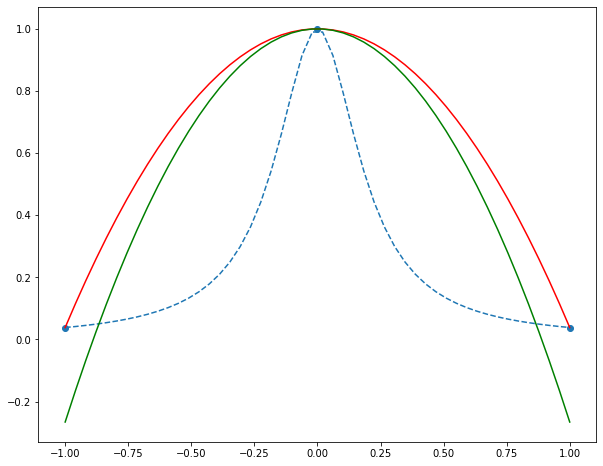

In [194]:
fig6,ax6 = plt.subplots(figsize=(10,8))
x = np.linspace(-1,1,3)
y = np.array([1/(1+25*i**2) for i in x])
G = pod_razlike(x,y)
dots = np.linspace(-1,1)
ax6.scatter(x,y)
ax6.plot(dots, [1/(1+25*i**2) for i in dots], linestyle='--')
ax6.plot(dots ,np.array([newton(x, G, i) for i in dots]), color='r' )

cheb = n_cheb_roots(3)

y2 = np.array([1/(1+25*i**2) for i in cheb])
G2 = pod_razlike(cheb,y2)
ax6.plot(dots ,np.array([newton(cheb, G2, i) for i in dots]), color='g' )

In [181]:
def faktorijel(n):
    res = 1
    for i in range(1,n+1):
        res *= i
    return res

def M(jedn,n,a,b):
    x = symbols('x')
    for i in range(n-1):
        der = sp.Derivative(jedn)
        der = der.doit()
        jedn = der

    der = sp.Derivative(jedn)
    der = der.doit()
    t = sp.solve(sp.Eq(der,0))
    max = 0
    t.append(a)
    t.append(b)
    for i in range(len(t)):
        if (t[i] >= a and t[i] <= b):
            if (max < abs(jedn.subs(x,t[i]))):
                max = abs(jedn.subs(x,t[i]))
    return max
    
def uniformna_greska(a,b,polje,f):
    x = symbols('x')
    funkcija = x - polje[0]
    for i in range(1,len(lista)):
        funkcija *= x - polje[i]
    n = len(polje)

    return (M(jedn,n+1,a,b)/faktorijel(n)*M(funkcija,1,a,b)).n(8)


ekvidist = np.linspace(-1,1,3)
cheb = n_cheb_roots(3)

x = symbols('x')
jedn = 1/(1 + 25*x**2) 

print('unif. greška za ekvidistantnu mrežu: ',uniformna_greska(-1,1,ekvidist,jedn))
print('unif. greška za Čebiševljevu mrežu: ',uniformna_greska(-1,1,cheb,jedn))

unif. greška za ekvidistantnu mrežu:  37.436027
unif. greška za Čebiševljevu mrežu:  24.315413


Vidimo dakle da se korištenjem Čebiševljevih čvorova smanjuje greška, što se vidi i s gornjeg prikaza uporedbe ta dva inteerpolacijska polinoma.

Napomea: kod kod crtanja je uglavnom kopiran iz funkcije crtaj

### Linearna regresija i metoda najmanjih kvadrata

Ponovno, neka je funkcija $f$ zadana na diskretnom skupu točaka $x_0, . . ., x_n$.
Takoder, pretpostavljamo da je tih točaka mnogo više nego nepoznatih parametara aproksimacione funkcije. Aproksimaciona funkcija 
$$\phi(x;a_0,...,a_m)$$ 
određuje se iz uvjeta da je 2-norma vektora pogrešaka u čvorovima aproksimacije
najmanja moguća, tj. tako da minimiziramo
$$ S = \sum_{k=0}^{n}(f(x_k) − \phi(x_k))^2 \longrightarrow min$$
<br>
Promatrat ću samo najjednostavniji slučaj, kada aproksimiramo <b>linearnom funkcijom</b>, tj. 

$$\phi(x)= Y = c + mX$$

$X,Y$ su polja dimenzije n


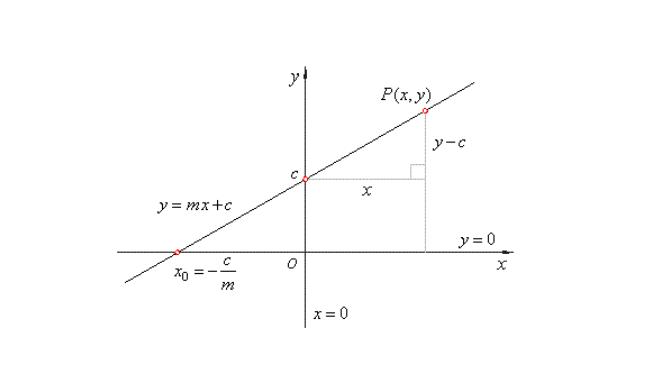

In [141]:
from IPython.display import Image
Image(filename='lin_reg.png')

Ovakva metoda vrlo je primnjenjiva u statistici.
Rješavanjem ovog problema dobiva se slijedeći rezultat: 

$$m = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n}(x_i - \overline{x})^2}$$<br>
$$c = \overline{y} - m\overline{x}$$<br>

In [18]:
def coef(X,Y):
    _x = np.mean(X)
    _y = np.mean(Y)
    gornja = donja = 0
    for i in range(len(X)):
        gornja += (X[i] - _x)*(Y[i] - _y)
        donja += (X[i] - _x)**2
    m = gornja/donja
    c = _y - m*_x
    return np.array([m,c])

#### Uploadat ću tablicu data.csv (koju sam našao na internetu) koja sadrži veliki broj dvodimenzionalnih točaka iz koje ću učitati podatke te izračunati pripadni regresijski pravac.

In [19]:
data=pd.read_csv('data.csv')
data.head()

,x,y
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


[1.28735737 9.90860619]


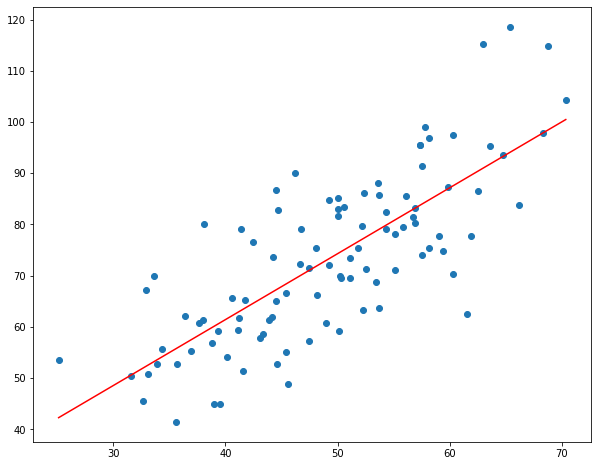

In [20]:
X = np.array(data['x'])
Y = np.array(data['y'])
t = coef(X,Y)
pocetak = min(X)
kraj = max(X)
arr = np.linspace(pocetak, kraj)
print(t)

fig5,ax5 = plt.subplots(figsize=(10,8))
plt.scatter(X,Y)
plt.plot(arr, [arr[i]*t[0] + t[1] for i in range(len(arr))], color ='r')
plt.show()



Numpy pak vec ima u sebi funkciju <b>numpy.linalg.lstsq</b> koja računa koeficijente $m$ i $c$. Vidimo da se dobiva isti rezultat.

In [21]:
A = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
print(m, c)

1.2873573700109324 9.908606190326516
